## Stock Price Prediction w/ ML

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)   # past 10 years of data

In [4]:
stock = "AAPL"    # Apple Stock
stock_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2004-12-03 00:00:00+00:00,0.944171,1.119286,1.160714,1.102679,1.152321,1238848800
2004-12-06 00:00:00+00:00,0.990866,1.174643,1.182857,1.124107,1.147321,1247920800
2004-12-07 00:00:00+00:00,0.947334,1.123036,1.191607,1.117143,1.177321,1056899200
2004-12-08 00:00:00+00:00,0.953208,1.130000,1.150536,1.108036,1.126429,691902400
2004-12-09 00:00:00+00:00,0.963903,1.142679,1.150000,1.108393,1.121607,741501600


In [6]:
stock_data.shape

(5033, 6)

In [7]:
stock_data.isna().sum()

,,0
Price,Ticker,
Adj Close,AAPL,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


Text(0.5, 1.0, 'Closing price of AAPL data')

<Figure size 1500x500 with 0 Axes>

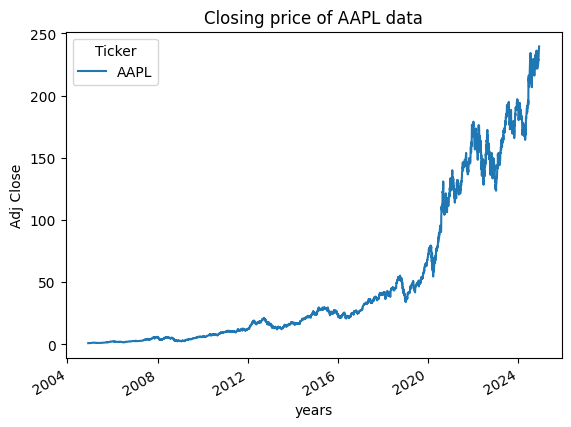

In [8]:
plt.figure(figsize = (15,5))
stock_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title(f"Closing price of {stock} data")

In [9]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of {stock} data")


In [10]:
# plot_graph((15,5), stock_data['Open'], 'Open')

In [11]:
stock_data.columns

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [12]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [13]:
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [14]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [15]:
for i in range(2004,2025):
    print(i,list(stock_data.index.year).count(i))

2004 20
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 232


In [16]:
stock_data['MA_for_250_days'] = stock_data['Adj Close'].rolling(250).mean()
stock_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2005-11-22 00:00:00+00:00,NaN
2005-11-23 00:00:00+00:00,NaN
2005-11-25 00:00:00+00:00,NaN
2005-11-28 00:00:00+00:00,NaN
2005-11-29 00:00:00+00:00,1.302


In [17]:
stock_data['MA_for_100_days'] = stock_data['Adj Close'].rolling(100).mean()
stock_data['MA_for_100_days'][0:250].tail()

,MA_for_100_days
Date,
2005-11-22 00:00:00+00:00,1.510817
2005-11-23 00:00:00+00:00,1.519593
2005-11-25 00:00:00+00:00,1.529219
2005-11-28 00:00:00+00:00,1.538868
2005-11-29 00:00:00+00:00,1.547861


<Figure size 640x480 with 0 Axes>

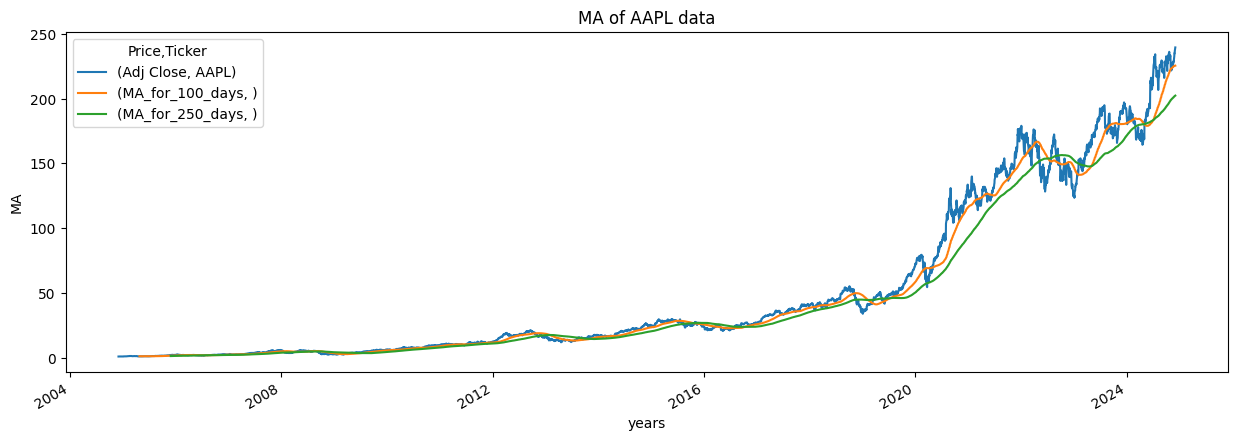

In [18]:
plot_graph((15,5), stock_data[['Adj Close','MA_for_100_days','MA_for_250_days']], 'MA')

In [19]:
stock_data['percentage_change_cp'] = stock_data['Adj Close'].pct_change()
stock_data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,AAPL,
Date,,
2004-12-03 00:00:00+00:00,0.944171,NaN
2004-12-06 00:00:00+00:00,0.990866,0.049457
2004-12-07 00:00:00+00:00,0.947334,-0.043934
2004-12-08 00:00:00+00:00,0.953208,0.006201
2004-12-09 00:00:00+00:00,0.963903,0.011220


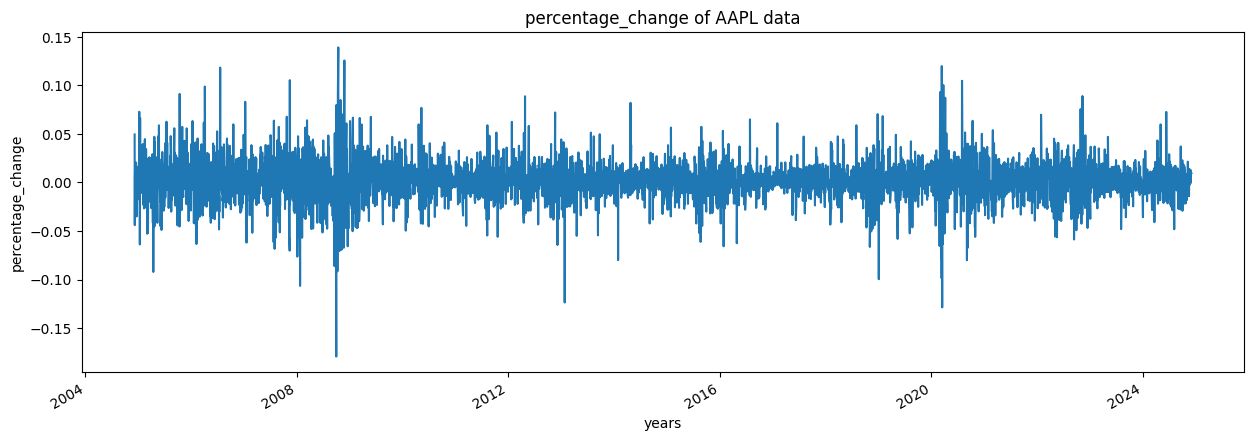

In [20]:
plot_graph((15,5), stock_data['percentage_change_cp'], 'percentage_change')

In [21]:
Adj_close_price = stock_data[['Adj Close']]

In [22]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([239.58999634]), array([0.94417077]))

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00000000e+00],
       [1.95668251e-04],
       [1.32533677e-05],
       ...,
       [9.80473140e-01],
       [9.90529922e-01],
       [1.00000000e+00]])

In [24]:
len(scaled_data)

5033

In [25]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [26]:
x_data[0],y_data[0]

(array([[0.00000000e+00],
        [1.95668251e-04],
        [1.32533677e-05],
        [3.78704042e-05],
        [8.26854391e-05],
        [1.55906649e-04],
        [1.40754841e-04],
        [1.64739980e-04],
        [1.62847034e-04],
        [2.47429914e-04],
        [1.45807775e-04],
        [2.52284537e-06],
        [6.37479892e-05],
        [6.75368778e-05],
        [8.39477360e-05],
        [3.02956240e-05],
        [9.46775090e-05],
        [1.11088367e-04],
        [1.33812957e-04],
        [1.08566271e-04],
        [3.85028014e-05],
        [7.95294472e-05],
        [1.14875757e-04],
        [1.18032998e-04],
        [4.14698484e-04],
        [3.96394430e-04],
        [1.18663397e-04],
        [1.75473249e-04],
        [4.49413396e-04],
        [4.74660332e-04],
        [5.03065758e-04],
        [4.54461584e-04],
        [4.91070191e-04],
        [4.92965385e-04],
        [5.10005643e-04],
        [5.91434030e-04],
        [6.04057998e-04],
        [6.28674535e-04],
        [7.1

In [27]:
int(len(x_data)*0.7)

3453

In [28]:
5033-100-int(len(x_data)*0.7)

1482

In [29]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [32]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 338s 96ms/step - loss: 2.3056e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 373s 94ms/step - loss: 3.5141e-05


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [36]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step


In [37]:
predictions

array([[0.14892519],
       [0.1497773 ],
       [0.15084079],
       ...,
       [0.89529705],
       [0.8996561 ],
       [0.9049035 ]], dtype=float32)

In [38]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 36.484543],
       [ 36.687897],
       [ 36.941692],
       ...,
       [214.60307 ],
       [215.64336 ],
       [216.89561 ]], dtype=float32)

In [44]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 36.99702454],
       [ 37.21670914],
       [ 37.44593811],
       ...,
       [234.92999268],
       [237.33000183],
       [239.58999634]])

In [40]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [41]:
rmse

7.5934392804268365

In [52]:
# Check what index you're passing to plotting_data
print(data.index)


RangeIndex(start=0, stop=10, step=1)


In [54]:
plotting_data = pd.DataFrame(
 {
    'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = stock_data.index[splitting_len+100:]
)
plotting_data.head()

,original_test_data,predictions
Date,,
2019-01-16 00:00:00+00:00,36.997025,36.484543
2019-01-17 00:00:00+00:00,37.216709,36.687897
2019-01-18 00:00:00+00:00,37.445938,36.941692
2019-01-22 00:00:00+00:00,36.605419,37.199482
2019-01-23 00:00:00+00:00,36.753468,37.120998


<Figure size 640x480 with 0 Axes>

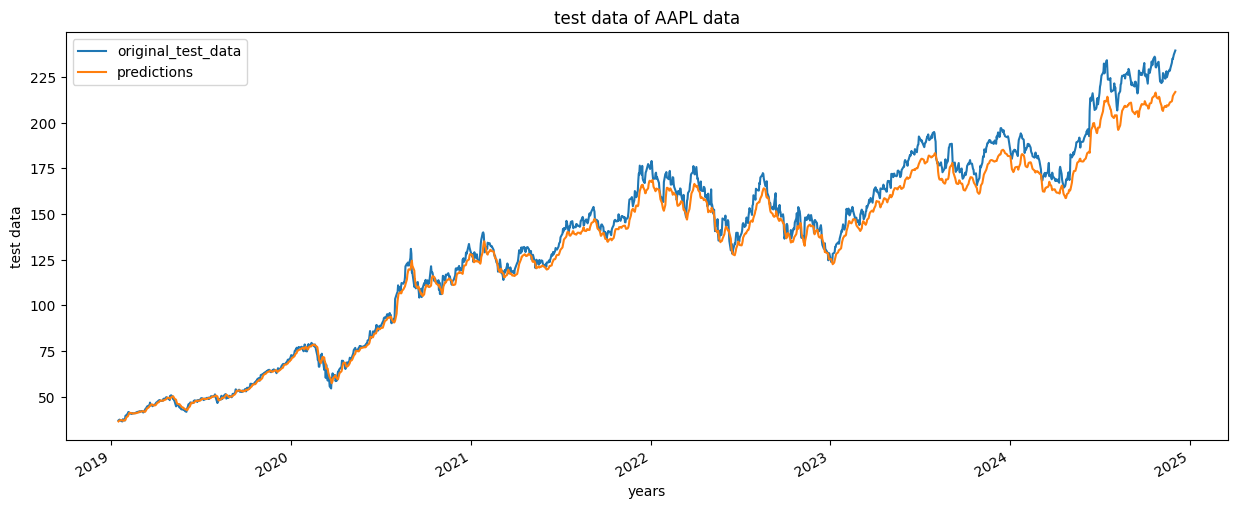

In [57]:
plot_graph((15,6), plotting_data, 'test data')

<Figure size 640x480 with 0 Axes>

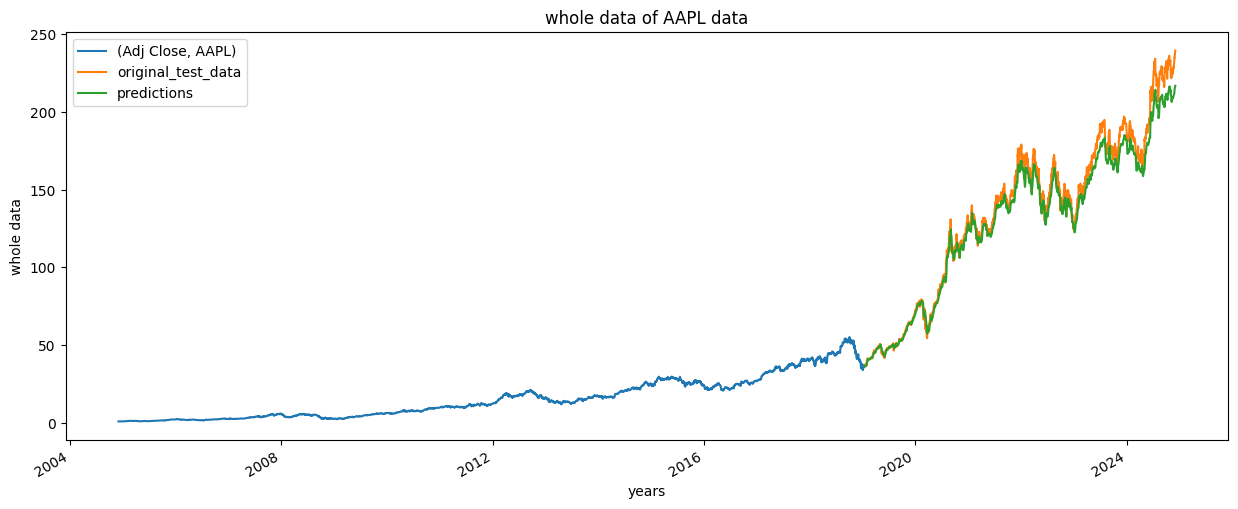

In [59]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],plotting_data], axis=0), 'whole data')

In [60]:
model.save("Latest_stock_price_model.keras")

In [61]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [62]:
!pip show keras

Name: keras
Version: 3.5.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow
